# Importing the data from csv files

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style


# Load the datasets
df1 = pd.read_csv("Transactions.csv")
df2 = pd.read_csv("Customers.csv")
df3 = pd.read_csv("Products.csv")



# Data Merging , Data Cleanup , etc

In [13]:
transactions_products_df = pd.merge(df1, df3, on="ProductID", how="left")
merged_df = pd.merge(transactions_products_df, df2, on="CustomerID", how="left")


In [14]:
merged_df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'ProductName', 'Category',
       'Price_y', 'CustomerName', 'Region', 'SignupDate'],
      dtype='object')

# Bussiness Insights
## 1. Sales Trends Over Time


In [20]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])

C:\Users\manic\AppData\Local\Temp\ipykernel_14168\2497557961.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])


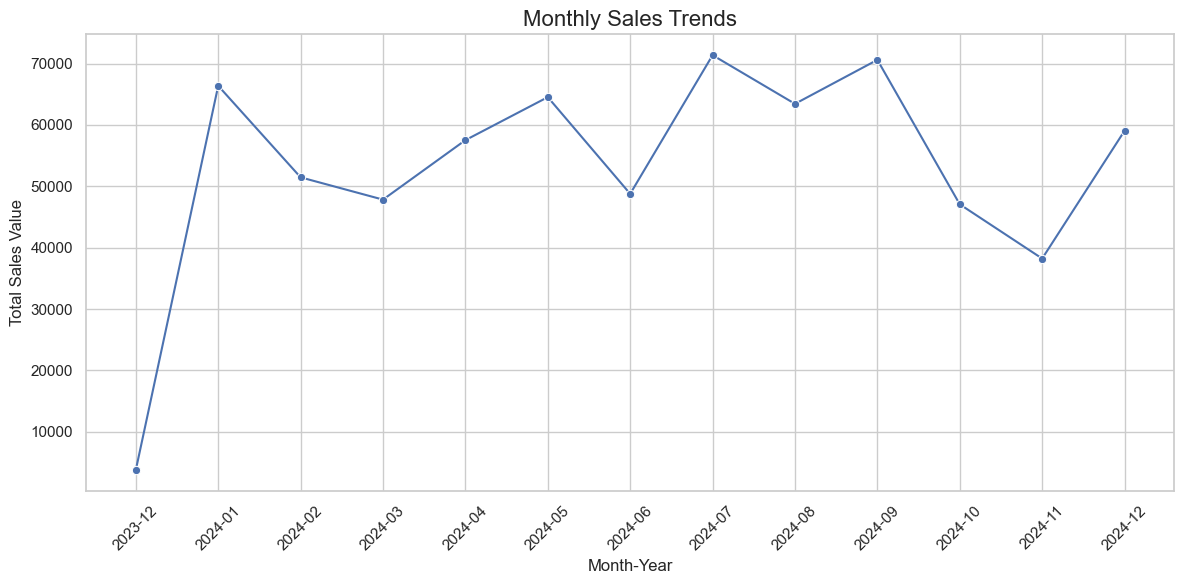

In [23]:
merged_df['MonthYear'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_sales = merged_df.groupby('MonthYear')['TotalValue'].sum().reset_index()
monthly_sales['MonthYear'] = monthly_sales['MonthYear'].astype(str)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='MonthYear', y='TotalValue', marker='o', color='b')
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# 2.Category Level Trend

C:\Users\manic\AppData\Local\Temp\ipykernel_14168\59621443.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='TotalValue', y='Category', palette='viridis')


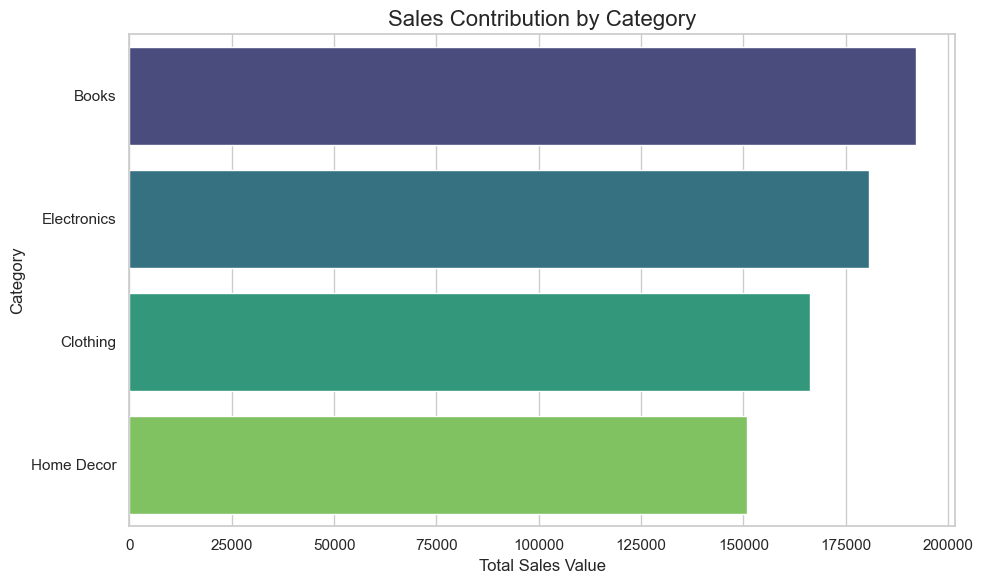

<Figure size 1400x700 with 0 Axes>

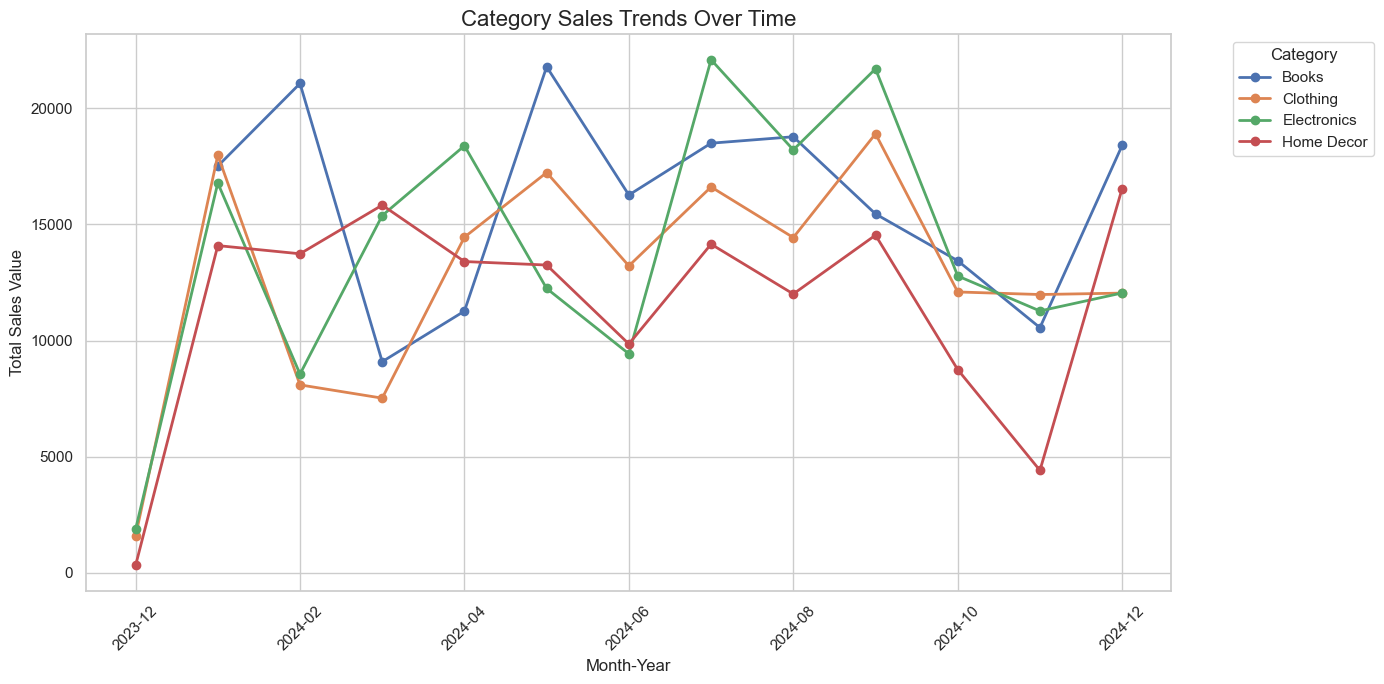

In [25]:
# Category-Level Trends
category_sales = merged_df.groupby('Category')['TotalValue'].sum().reset_index()
category_sales = category_sales.sort_values(by='TotalValue', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='TotalValue', y='Category', palette='viridis')
plt.title('Sales Contribution by Category', fontsize=16)
plt.xlabel('Total Sales Value', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

category_monthly_sales = merged_df.groupby(['MonthYear', 'Category'])['TotalValue'].sum().unstack()
category_monthly_sales.index = category_monthly_sales.index.astype(str)

plt.figure(figsize=(14, 7))
category_monthly_sales.plot(kind='line', figsize=(14, 7), marker='o', linewidth=2)
plt.title('Category Sales Trends Over Time', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 3.Top Performance Calculations

C:\Users\manic\AppData\Local\Temp\ipykernel_14168\643847695.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='TotalValue', y='ProductName', palette='coolwarm')


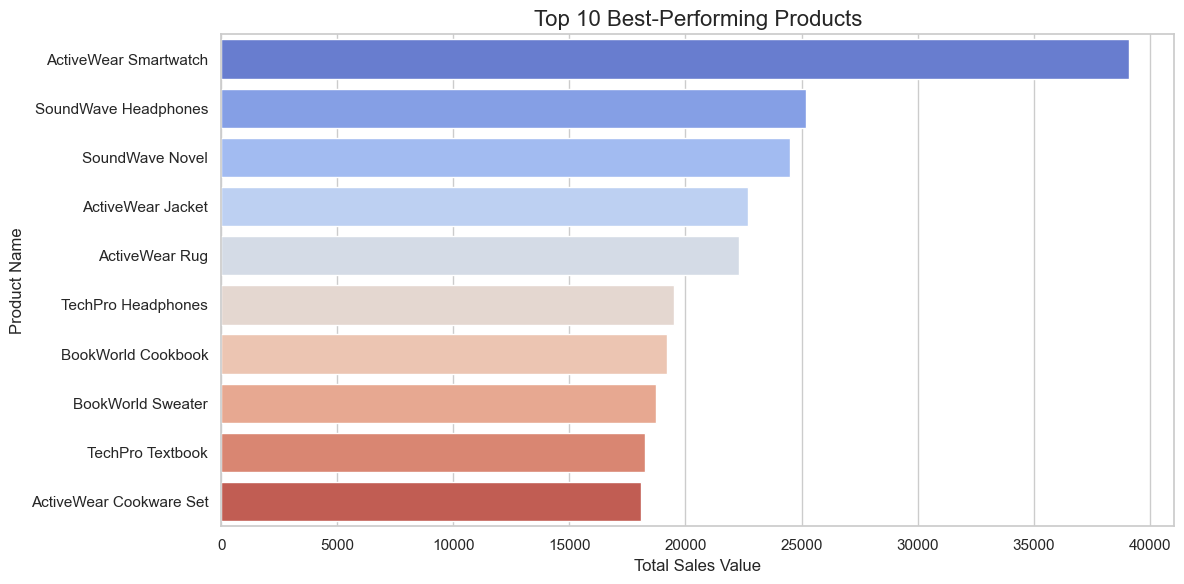

In [26]:
# Top-Performing Products
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().reset_index()
top_products = top_products.sort_values(by='TotalValue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='TotalValue', y='ProductName', palette='coolwarm')
plt.title('Top 10 Best-Performing Products', fontsize=16)
plt.xlabel('Total Sales Value', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()

##  4. Regional Sales Contribution

C:\Users\manic\AppData\Local\Temp\ipykernel_14168\3901212779.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_sales, x='TotalValue', y='Region', palette='magma')


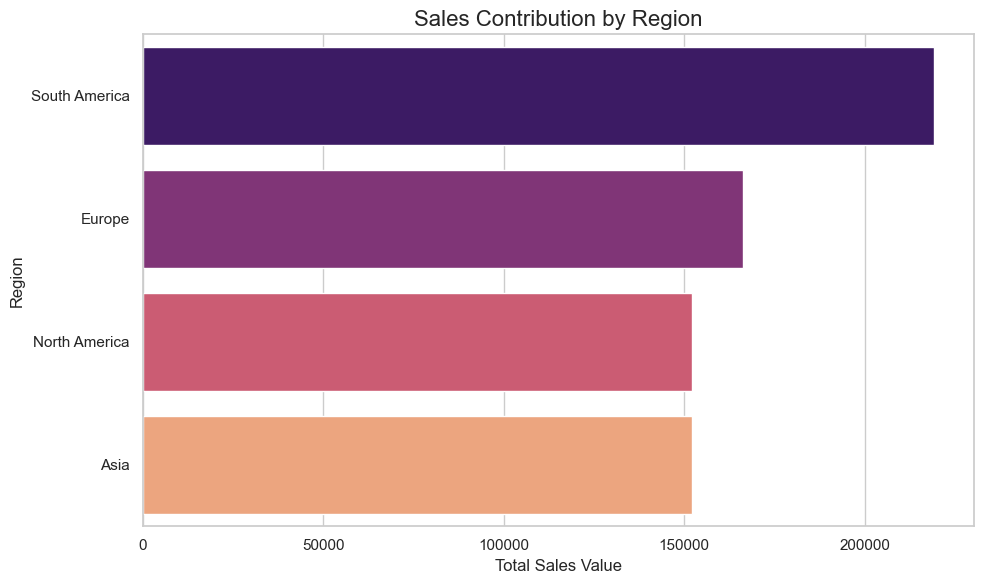

In [27]:

regional_sales = merged_df.groupby('Region')['TotalValue'].sum().reset_index()
regional_sales = regional_sales.sort_values(by='TotalValue', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=regional_sales, x='TotalValue', y='Region', palette='magma')
plt.title('Sales Contribution by Region', fontsize=16)
plt.xlabel('Total Sales Value', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()

## 5.Top Costumers of Lifetime 

C:\Users\manic\AppData\Local\Temp\ipykernel_14168\768643465.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_ltv, x='TotalValue', y='CustomerName', palette='viridis')


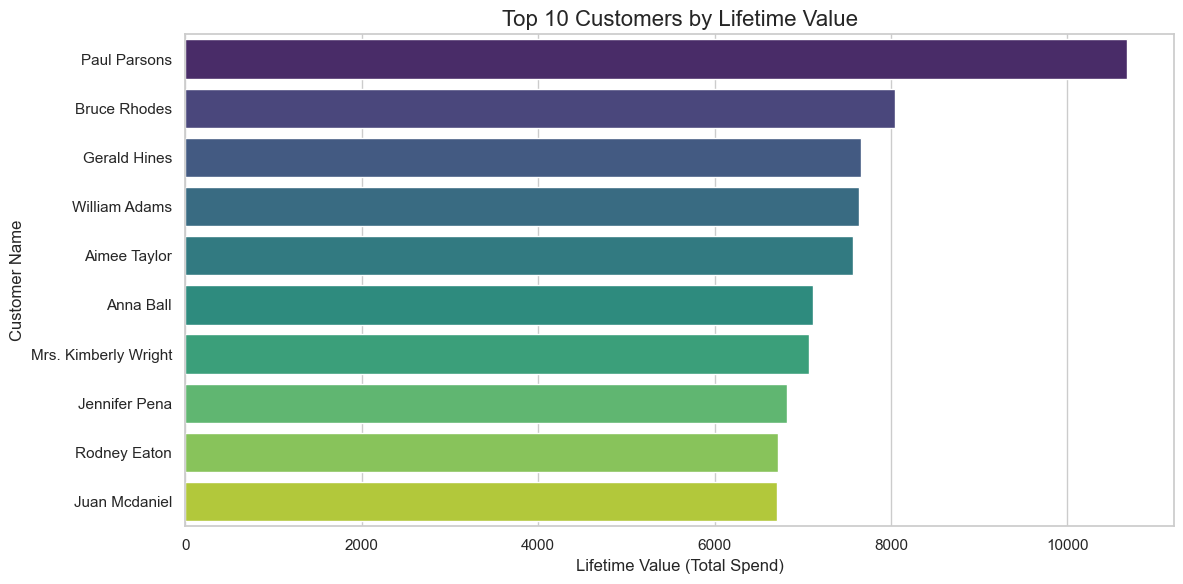

In [28]:
# Top Customers by Lifetime Value (LTV)
customer_ltv = merged_df.groupby('CustomerName')['TotalValue'].sum().reset_index()
customer_ltv = customer_ltv.sort_values(by='TotalValue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=customer_ltv, x='TotalValue', y='CustomerName', palette='viridis')
plt.title('Top 10 Customers by Lifetime Value', fontsize=16)
plt.xlabel('Lifetime Value (Total Spend)', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)
plt.tight_layout()
plt.show()
